<a href="https://colab.research.google.com/github/RAGHU1242/Face_Recognition_using_CNN/blob/main/4_Face_Recognition_using_CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.**Face recognition** using **CNN**

# **Steps:**
# **1. Understand the Business Problem**
# **2. Import Library files**
# **3. Load the dataset**
# **4. Data preprocessing**
# **5. Model Building**
# **5.1 Convolution**
# **5.2 pooling**
# **5.3 Flattenting**
# **5.4 Full connection**
# **5.5 Output layer**
# **6. Compile the model**
# **7. Train the model**
# **8. Test the model**

## **1. Understand Business Statement**
The implementation of a Convolutional Neural Network (CNN) for face recognition provides a robust, scalable, and intelligent solution for identity verification and security applications. By leveraging deep learning techniques, the system can automatically extract facial features, learn complex patterns, and deliver high-accuracy recognition in real time. This technology has significant business value across domains such as banking (secure authentication), corporate environments (employee access control), retail (personalized customer experiences), and public safety (surveillance and threat detection). Adopting CNN-based face recognition enhances operational efficiency, reduces security risks, and supports data-driven decision-making for sustainable growth.

# **2. Import Library files**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **3. Load the dataset**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# /content/drive/MyDrive/Face Recognition using CNN/Original Images
train_dir="/content/drive/MyDrive/Face Recognition using CNN/Original Images/Original Images/"


# **4. Data preprocessing**



In [ ]:
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32)

Found 2698 images belonging to 31 classes.


In [ ]:
classes = list(train_ds.class_indices.keys())
classes

['Akshay Kumar',
 'Alexandra Daddario',
 'Alia Bhatt',
 'Amitabh Bachchan',
 'Andy Samberg',
 'Anushka Sharma',
 'Billie Eilish',
 'Brad Pitt',
 'Camila Cabello',
 'Charlize Theron',
 'Claire Holt',
 'Courtney Cox',
 'Dwayne Johnson',
 'Elizabeth Olsen',
 'Ellen Degeneres',
 'Henry Cavill',
 'Hrithik Roshan',
 'Hugh Jackman',
 'Jessica Alba',
 'Kashyap',
 'Lisa Kudrow',
 'Margot Robbie',
 'Marmik',
 'Natalie Portman',
 'Priyanka Chopra',
 'Robert Downey Jr',
 'Roger Federer',
 'Tom Cruise',
 'Vijay Deverakonda',
 'Virat Kohli',
 'Zac Efron']


# **5. Model Building**


In [ ]:
model = Sequential()


# **5.1 Convolution** and  **5.2 pooling**


In [ ]:
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **5.1 Convolution** and  **5.2 pooling**

In [ ]:
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

# **5.1 Convolution** and  **5.2 pooling**

In [ ]:
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

# **5.1 Convolution** and  **5.2 pooling**

In [ ]:
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

# **5.1 Convolution** and  **5.2 pooling**

In [ ]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

# **5.3 Flattenting**


In [ ]:
model.add(Dropout(0.2))
model.add(Flatten())



# **5.4 Full connection** and  **5.5 Output layer**


In [ ]:
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes),activation='softmax'))


# **6. Compile the model**


In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 5, 5, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,071 (965.12 KB)

 Trainable params: 246,495 (962.87 KB)

 Non-trainable params: 576 (2.25 KB)

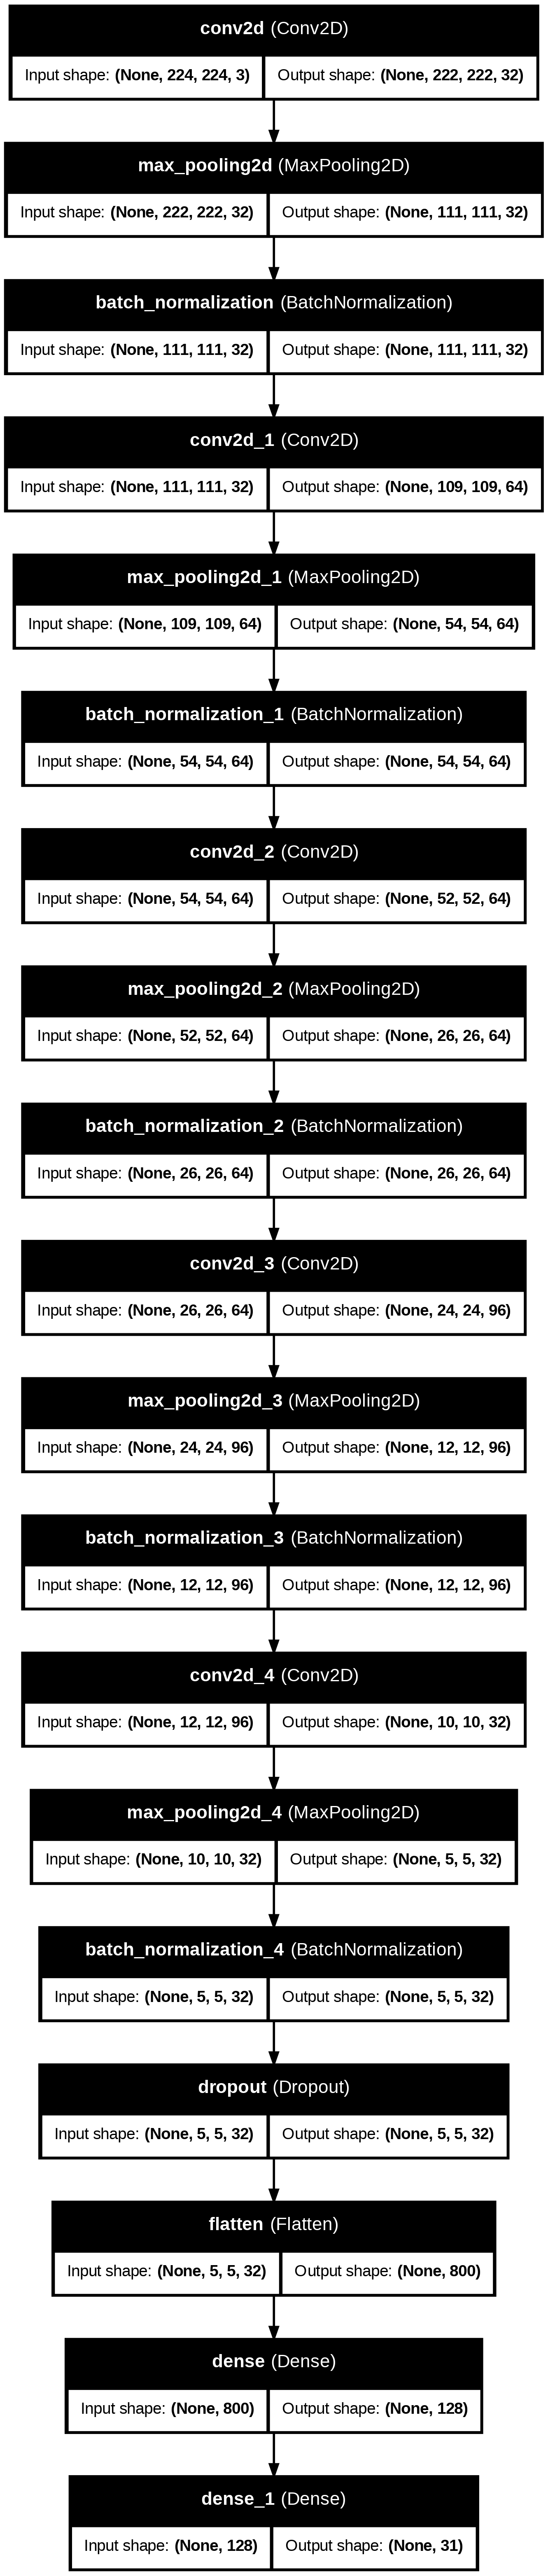

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,
    to_file='model.png',
    show_shapes=True, show_layer_names=True)


# **7. Train the model**


In [ ]:
history = model.fit(train_ds,epochs= 10, batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 347s 4s/step - accuracy: 0.0771 - loss: 3.6886
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 335s 4s/step - accuracy: 0.2216 - loss: 2.7093
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 340s 4s/step - accuracy: 0.3374 - loss: 2.2253
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 341s 4s/step - accuracy: 0.4869 - loss: 1.7378
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 341s 4s/step - accuracy: 0.5807 - loss: 1.4095
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 331s 4s/step - accuracy: 0.6912 - loss: 1.0734
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 388s 4s/step - accuracy: 0.7499 - loss: 0.8739
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 331s 4s/step - accuracy: 0.8200 - loss: 0.6495
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.8587 - loss: 0.4897
Epoch 10/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 329s 4s/step - accuracy: 0.8966 - loss: 0.3787


# **8. Test the model**

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
def predict_image(image_path):
  img = load_img(image_path, target_size=(224,224,3))
  plt.imshow(img)
  plt.show()
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  pred = model.predict(images, batch_size=32)
  print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
  print("Predicted: "+classes[np.argmax(pred)])

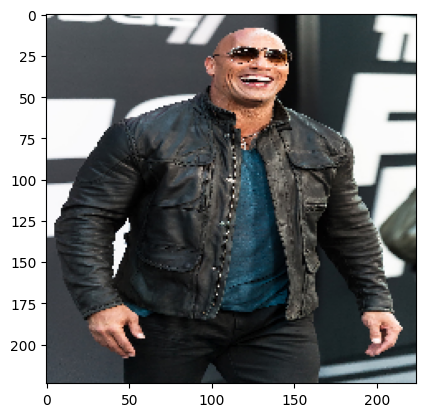

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
Actual: Dwayne Johnson
Predicted: Dwayne Johnson


In [ ]:
predict_image("/content/drive/MyDrive/Face Recognition using CNN/Original Images/Original Images/Dwayne Johnson/Dwayne Johnson_11.jpg")